In [46]:
import pandas as pd
airPollData = pd.read_csv('../data/VisData.csv')
airPollData.shape

(525, 29)

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# df = airPollData.sample(frac=0.25, replace=True, random_state=1)
df = airPollData
for col in df.columns.values:
    if df[col].dtype==object:
        df[col] = le.fit_transform(df[col])
df.head()

,State,County,Year,NO2_Units,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Units,O3_Mean,...,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI,YPLL Rate,% Fair/Poor,Physically Unhealthy Days,TotalPop,TotalMalePop,TotalFemalePop
0,2,66,2010,0,12.09,27.02,14,25.29,0,0.03,...,0.25,0.46,8,2.09,8019,14,3.6,981653,499499,482154
1,2,66,2011,0,11.78,25.56,12,23.66,0,0.03,...,0.19,0.33,6,1.50,7699,14,3.7,988407,502199,486208
2,2,66,2012,0,13.39,28.19,14,26.15,0,0.03,...,0.21,0.37,7,1.69,7721,15,3.7,993215,504528,488687
3,2,66,2013,0,11.00,23.93,12,22.14,0,0.03,...,0.17,0.31,6,1.41,11848,17,3.9,997437,506602,490835
4,2,66,2014,0,11.35,24.22,13,22.40,0,0.03,...,0.21,0.35,6,1.63,7390,14,3.7,1004675,509783,494892


In [69]:
on = preprocessing.OneHotEncoder()
df2 = pd.read_csv('../data/VisData.csv')
df2 = df2.drop(['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units'], axis=1)
for col in ['O3_Mean', 'O3_1st_Max_Value', 'CO_Mean', 'CO_1st_Max_Value']:
    df2[col] = df2[col].apply(lambda x: x*1000)
cats = ['State', 'County', 'Year', 'NO2_1st_Max_Hour', 'O3_1st_Max_Hour', 'SO2_1st_Max_Hour', 'CO_1st_Max_Hour']
for col in cats:
    df2[col] = df2[col].astype(object)
# for col in df2.columns.values:
#     if col in cats:
#         # print(col, df2[col].dtype)
#         continue
#     else:
#         print(col)
df2 = pd.concat([df2,pd.get_dummies(df2[cats])],axis=1)
df2 = df2.drop(cats, axis=1)
# for i in df2.dtypes:
#     print(i)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
float64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
ui

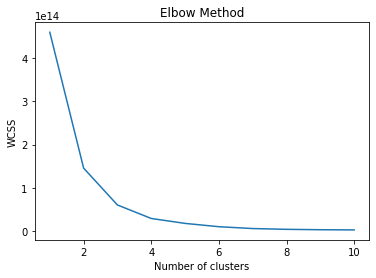

In [71]:
df = df2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(4, 214)


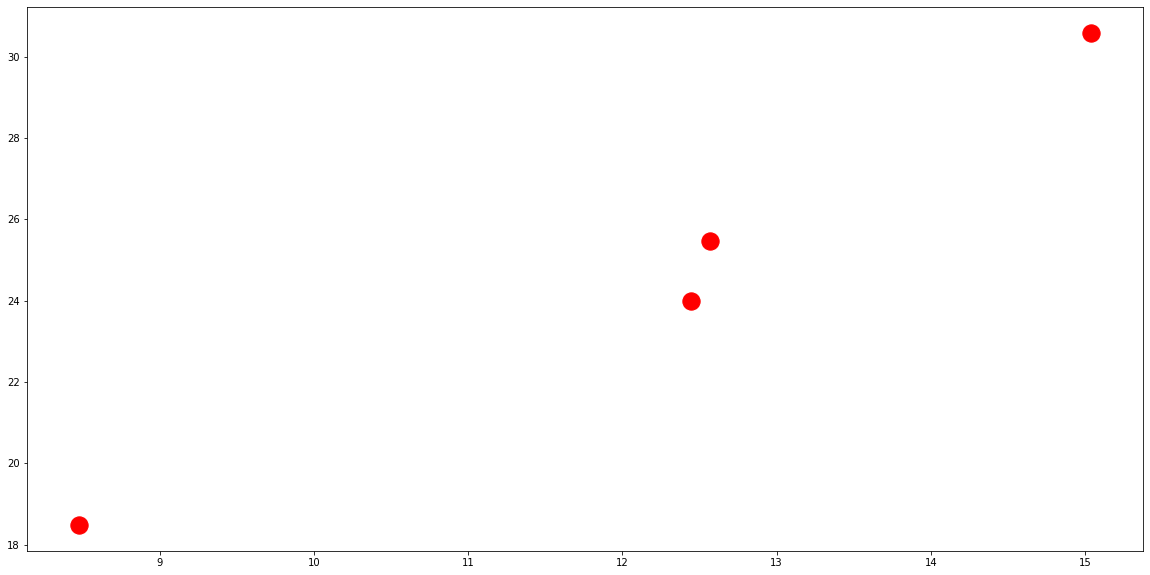

214

In [91]:
no_of_clusters = 4
kmeans = KMeans(n_clusters=no_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)

print(kmeans.cluster_centers_.shape)
plt.figure(figsize=(20,10))
# plt.scatter(np.array(df.iloc[:,0]), np.array(df.iloc[:,1]), s=30, c='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

# plt.
plt.show()
df['Cluster'] = pred_y
column_list = list(df.columns.values)
len(column_list)

73 0.7501496532352322


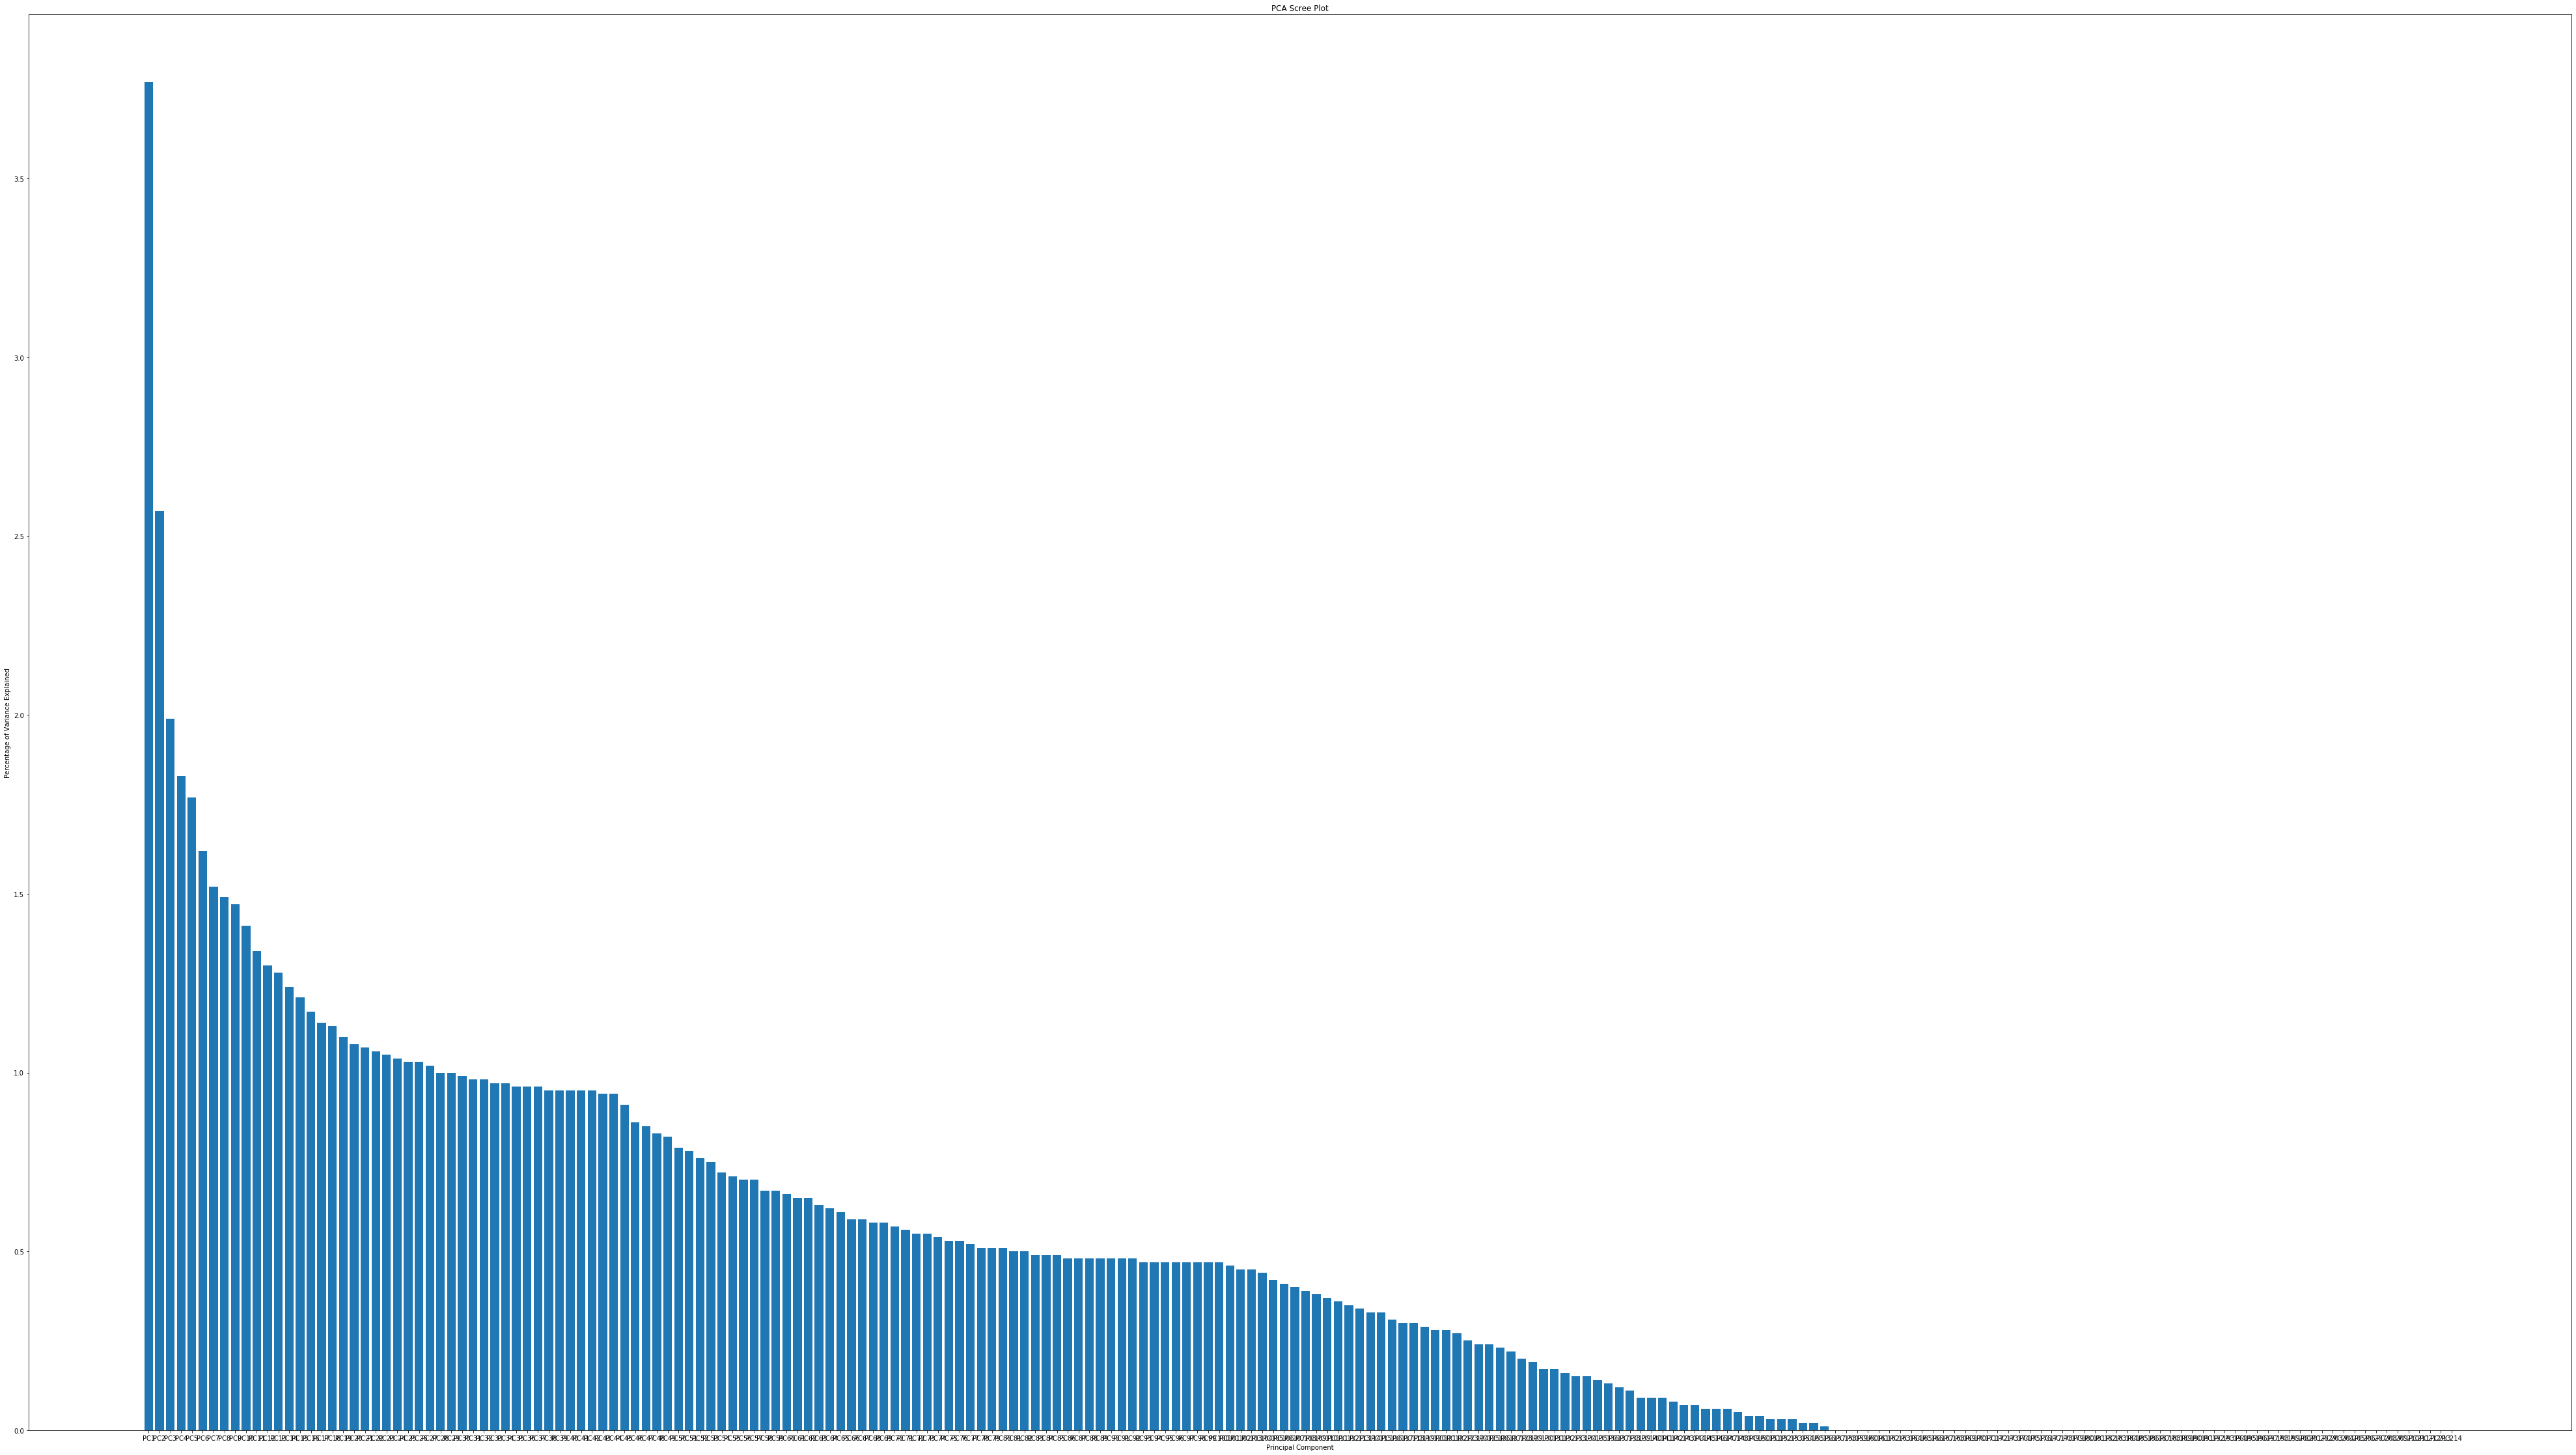

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=len(column_list))
x = StandardScaler().fit_transform(df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# print(sum(pca.explained_variance_ratio_[:6]))
# 
for p in range(len(list(pca.explained_variance_ratio_))):
    if sum(pca.explained_variance_ratio_[:p]) >= 0.75:
        print(p, sum(pca.explained_variance_ratio_[:p]))
        break

columns = ['PC'+str(x) for x in range(1, len(column_list)+1)]
plt.figure(figsize=(70,40))
plt.bar(x= range(1, len(column_list)+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

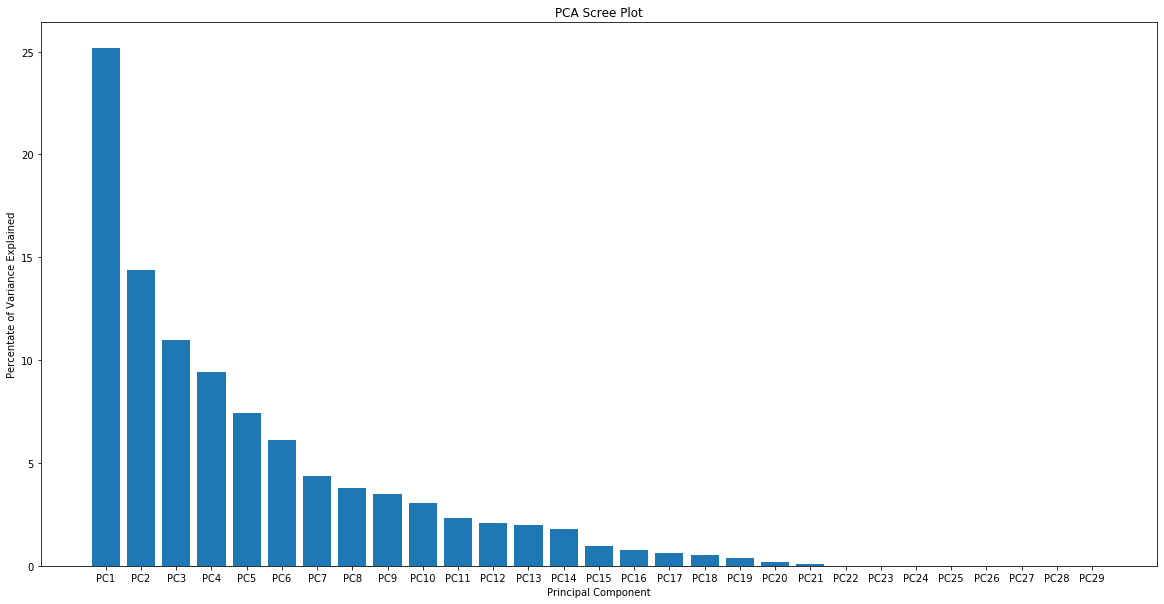

In [52]:
randomSampled = df.sample(frac=0.30, replace=True, random_state=1)
pca = PCA(n_components=29)
x = StandardScaler().fit_transform(randomSampled)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC'+str(x) for x in range(1, 30)]
plt.figure(figsize=(20,10))
plt.bar(x= range(1,30), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

(525, 30)
(156, 30)


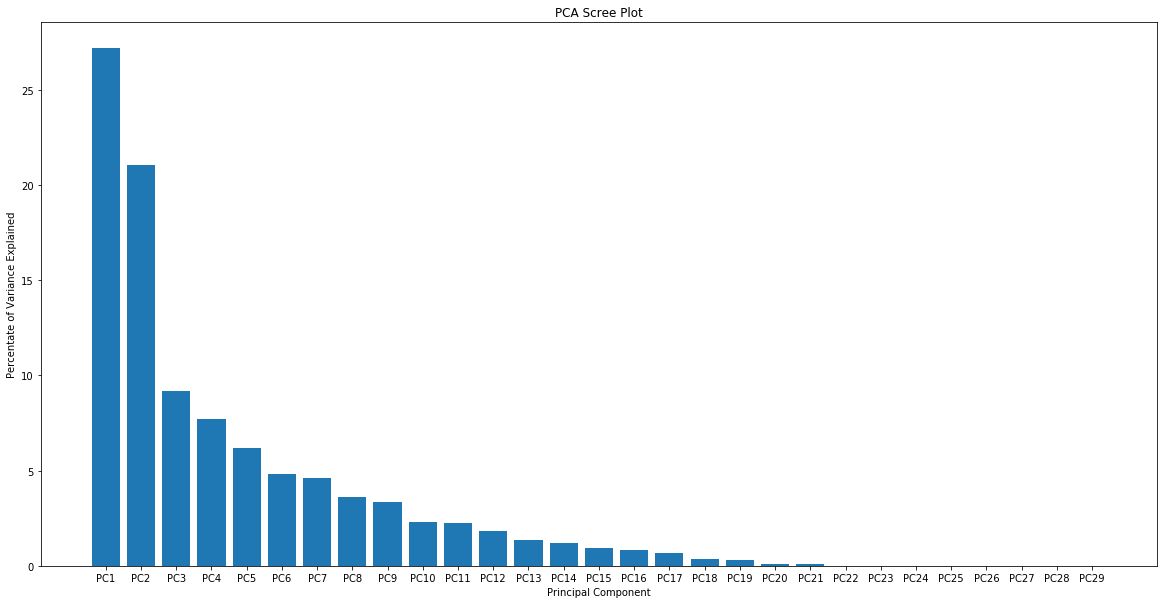

0.27176167920166927

In [53]:
#Bigger clusters should get more samples
needed_len = int(df.shape[0]*0.30)
print(df.shape)
points_from_one_cluster = int(needed_len/no_of_clusters)
firstDf = df[df['Cluster']==0].sample(n=points_from_one_cluster, replace=True, random_state=1)
for i in range(1, no_of_clusters):
    firstDf = pd.concat([firstDf, df[df['Cluster']==i].sample(n=points_from_one_cluster, replace=True, random_state=1)], ignore_index=True)

pca = PCA(n_components=29)
print(firstDf.shape)
x = StandardScaler().fit_transform(firstDf)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC'+str(x) for x in range(1, 30)]
plt.figure(figsize=(20,10))
plt.bar(x= range(1,30), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
sum(pca.explained_variance_ratio_[:1])

In [54]:
for i in range(1,30):
    if sum(pca.explained_variance_ratio_[:i]) >= 0.75:
        print(i, sum(pca.explained_variance_ratio_[:i]))
        break
for i in range(len(pca.components_[:6])):
    for j in range(len(pca.components_[0])):
        print(round(pca.components_[i][j], 4), end='\t\t')
    print()

6 0.7617593341461728
-0.1377		-0.0422		0.0025		-0.0		0.3419		0.3454		0.2422		0.3452		0.0		-0.1366		0.0125		0.0373		0.0215		0.0		0.0845		0.0929		0.1094		0.0915		-0.0		0.3096		0.346		0.2132		0.3419		-0.0264		0.0446		-0.0494		0.2025		0.2024		0.2026		0.0485		
0.173		-0.1559		-0.0796		-0.0		0.0442		0.0303		0.0401		0.0305		0.0		-0.2245		-0.2068		0.1553		-0.2038		0.0		0.311		0.3357		0.2315		0.3289		-0.0		0.0438		-0.0207		0.112		-0.0028		0.2045		0.131		0.2002		-0.3064		-0.306		-0.3067		-0.0921		
0.0771		-0.1204		0.0879		0.0		0.0373		0.0942		0.0487		0.095		0.0		0.3017		0.4673		-0.0198		0.4897		-0.0		-0.0303		-0.0176		0.1387		-0.0197		0.0		-0.0461		-0.021		0.0571		-0.021		0.3246		0.3018		0.2528		-0.0958		-0.0972		-0.0943		0.2925		
0.2081		-0.1287		-0.254		-0.0		0.0425		0.0617		-0.1226		0.0673		-0.0		0.2434		0.2257		-0.046		0.1458		0.0		0.3229		0.3127		-0.0722		0.319		-0.0		-0.0978		-0.0939		-0.007		-0.0978		-0.316		-0.3018		-0.3858		0.0335		0.0335		0.0334		0.1916		
-0.191		0.138		-0.3001		0.0		-